<a href="https://colab.research.google.com/github/tmoura/machinelearning/blob/master/perceptron_NaMa%CC%83o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
#############
#
# Implementação do Perceptron para reconhecimento dos padrões H e T
#
#############
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/tmoura/machinelearning/master/irisPerceptron.data"

# IRIS
col_names = ['label', 'x1', 'x2','x3','x4']
feature_cols = ['x1', 'x3']

# Carregar base de dados
dataset = pd.read_csv(url, header=None, names=col_names)

dataset.pop('x2') # Remove coluna x2
dataset.pop('x4') # Remove coluna x4

X = dataset[feature_cols] # Atributos (Features)
y = dataset.label # Saída

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, stratify=y) # 80% treino e 20% teste

### Tranforma os dados em listas

train_x = X_train.values.tolist()
train_y = y_train.values.tolist()

test_x = X_test.values.tolist()
test_y = y_test.values.tolist()

In [62]:
######
#
# Classe Perceptron
#
######
class Perceptron:

  def __init__(self):

    self.teta = 0
    self.w = [0,0]
    self.n = 0.05

  def train_perceptron(self,train_x,train_y):

    for i in range(100):
      for j in range(len(train_x)):

        u = sum(np.array(self.w) * np.array(train_x[j])) + self.teta

        if(u >= 0):
          y = 1
        else:
          y = -1

        erro = train_y[j] - y

        self.w = list(np.array(self.w) + (self.n * np.array(train_x[j]) * erro))

        self.teta = self.teta + (self.n * 1 * erro)

  def predict_perceptron(self,test_x):

    results = []

    for i in range(len(test_x)):
        
        u = sum(np.array(self.w) * np.array(test_x[i])) + self.teta
        
        if (u >= 0):
            results.append(1)
        else:
            results.append(-1);

    return results

In [ ]:
######
#
# Cálculo da Acurácia
#
######
model = Perceptron()
model.train_perceptron(train_x,train_y)

result = model.predict_perceptron(test_x)

acc = metrics.accuracy_score(result, test_y)
show = round(acc * 100)
print("{}%".format(show))


## Plotagem do Cojunto de Treinamento

Text(0, 0.5, 'Atributo X3')

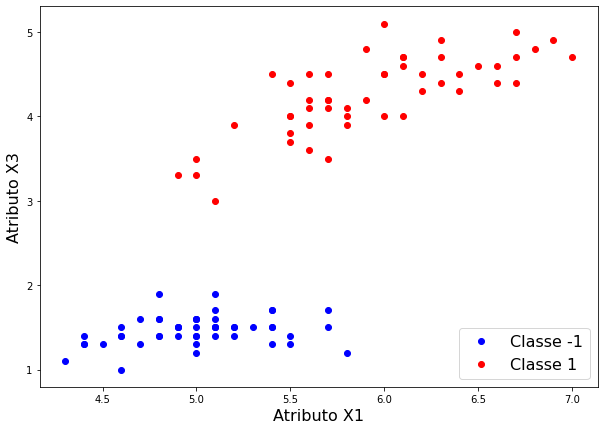

In [64]:
import matplotlib.pyplot as plt
import pandas as pd

url = "https://raw.githubusercontent.com/tmoura/machinelearning/master/irisPerceptron.data"

col_names = ['label', 'x1', 'x2','x3','x4']

# Carregar base de dados
dataset = pd.read_csv(url, header=None, names=col_names)

dataset.pop('x2') # Remove coluna x2
dataset.pop('x4') # Remove coluna x2

df1 = dataset.loc[dataset['label'] == -1]
df2 = dataset.loc[dataset['label'] == 1]

plt.figure(figsize=(10,7))
plt.plot(df1['x1'],df1['x3'],'o', color='blue', label='Classe -1')
plt.plot(df2['x1'],df2['x3'],'o', color='red', label='Classe 1')
plt.legend(loc="lower right", fontsize=16)

plt.xlabel('Atributo X1',fontsize=16)
plt.ylabel('Atributo X3',fontsize=16)